# Download dataset form  this website

## https://www.kaggle.com/faressayah/stanford-open-policing-project?select=police_project.csv

## Description::

On a typical day in the United States, police officers make more than 50,000 traffic stops. Our team is gathering, analyzing, and releasing records from millions of traffic stops by law enforcement agencies across the country. Our goal is to help researchers, journalists, and policymakers investigate and improve interactions between police and the public.


## Importing libraries::

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# Use Pandas' read_csv function  open it as a DataFrame

In [2]:
df1 = pd.read_csv("police_project.csv")

# What does each row represent?

#### hint::
head : Return the first n rows. (By default return first 5 rows.)

In [3]:
df1.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


# How to get the basic statistics of all the columns?

In [4]:
df1.describe()

,county_name,driver_age_raw,driver_age
count,0.0,86414.000000,86120.000000
mean,NaN,1970.491228,34.011333
std,NaN,110.914909,12.738564
min,NaN,0.000000,15.000000
25%,NaN,1967.000000,23.000000
50%,NaN,1980.000000,31.000000
75%,NaN,1987.000000,43.000000
max,NaN,8801.000000,99.000000


# How to check the shape of dataset?

In [5]:
df1.shape

(91741, 15)

# Check the type of columns?

In [6]:
df1.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

# Locating missing Values?
#### detecting missing values
#### calculates the sum of each column


In [7]:
df1.isna().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

# Dropping Column that only contains missing values.

In [8]:
a = df1.drop(['county_name', 'search_type'], axis=1)

In [9]:
display(a)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,M,1986.0,29.0,White,Speeding,Speeding,False,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,M,1993.0,22.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


# Do the men or women speed more often?

In [10]:
a['violation'].unique()

array(['Speeding', 'Other', 'Equipment', 'Moving violation', nan,
       'Registration/plates', 'Seat belt'], dtype=object)

In [11]:
cond1 = a['violation'] == 'Speeding'
cond1

0         True
1         True
2         True
3        False
4         True
         ...  
91736     True
91737    False
91738    False
91739     True
91740     True
Name: violation, Length: 91741, dtype: bool

In [12]:
cond2 = a[cond1]
cond2

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
6,2005-04-01,17:30,M,1969.0,36.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91734,2015-12-31,20:20,M,1993.0,22.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
91735,2015-12-31,20:25,M,1992.0,23.0,Hispanic,Speeding,Speeding,False,Citation,False,0-15 Min,False
91736,2015-12-31,20:27,M,1986.0,29.0,White,Speeding,Speeding,False,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,M,1993.0,22.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [13]:
cond2['driver_gender'].value_counts()

M    32979
F    15482
Name: driver_gender, dtype: int64

# Men speed more often

# Which year had the least number of stops?

In [14]:
time = pd.to_datetime(a['stop_date'])

In [15]:
time.dt.year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [16]:
print('Least no of stops in:', time.dt.year.min())

Least no of stops in: 2005


# Does gender affect who gets searched during a stop?

In [17]:
searchcond = a['search_conducted']
searchcond

0        False
1        False
2        False
3        False
4        False
         ...  
91736    False
91737    False
91738    False
91739    False
91740    False
Name: search_conducted, Length: 91741, dtype: bool

In [18]:
a[searchcond]['driver_gender'].value_counts()

M    2725
F     471
Name: driver_gender, dtype: int64


# How does drug activity change by time of day?

In [19]:
drug = a['drugs_related_stop']
drug

0        False
1        False
2        False
3        False
4        False
         ...  
91736    False
91737    False
91738    False
91739    False
91740    False
Name: drugs_related_stop, Length: 91741, dtype: bool

In [20]:
time_of_day = pd.to_datetime(a[drug]['stop_time'])
time_of_day

40      2021-03-02 00:00:00
41      2021-03-02 00:00:00
118     2021-03-02 01:20:00
139     2021-03-02 00:20:00
219     2021-03-02 23:30:00
                ...        
91194   2021-03-02 14:48:00
91253   2021-03-02 10:33:00
91284   2021-03-02 14:10:00
91672   2021-03-02 11:05:00
91700   2021-03-02 08:51:00
Name: stop_time, Length: 815, dtype: datetime64[ns]

In [21]:
time_of_day.dt.hour.value_counts()

0     103
23     92
1      60
13     50
22     47
2      46
14     44
9      43
10     42
11     41
15     31
19     30
20     27
16     22
18     22
3      20
21     20
12     16
17     16
7      15
8      14
6      10
4       3
5       1
Name: stop_time, dtype: int64

# most drug activity takes place at hour 0 (103 stops) then hour 23 (92 stops) 
# 60 stops at hour 1, so most drug activites are taking place during night time

# Do most stops occur at night?

In [23]:
# converting stop_time to datetime and then filtering out night time
time_of_stops = pd.to_datetime(a['stop_time'])
#time_of_stops
# considering 6 pm to 6 am as night

# stop should be after 5 pm   OR   before 7 am

df5 = (time_of_stops.dt.hour > 17) | (time_of_stops.dt.hour < 7) # 8pm-6am
df5
a['stop_time'].value_counts()



11:00    323
10:00    317
09:00    292
09:30    290
10:30    287
        ... 
04:47      1
05:53      1
05:32      1
04:50      1
05:35      1
Name: stop_time, Length: 1436, dtype: int64

In [24]:
a[df5].shape # 36260 rows



(36260, 13)

In [ ]:
#a[df5].shape[0] / df.shape[0] night stops / total stops      40 percent

In [25]:
# converting stop_time to datetime and then filtering out night time
time_of_stops = pd.to_datetime(a['stop_time'])

# considering 6 pm to 6 am as night

# stop should be after 5 pm   OR   before 7 am

filt = (time_of_stops.dt.hour > 17) | (time_of_stops.dt.hour < 7) # 8pm-6am
filt
a['stop_time'].value_counts()

a[filt].shape # 36260 rows

#a['stop_time'].shape[0] / a.shape[0]  night stops / total stops      40 percent

(36260, 13)

In [26]:
a.stop_time.sort_index().value_counts().sort_index()

00:00    154
00:01     87
00:02     81
00:03     75
00:04     82
        ... 
23:55    164
23:56     79
23:57     78
23:58     77
23:59     82
Name: stop_time, Length: 1436, dtype: int64

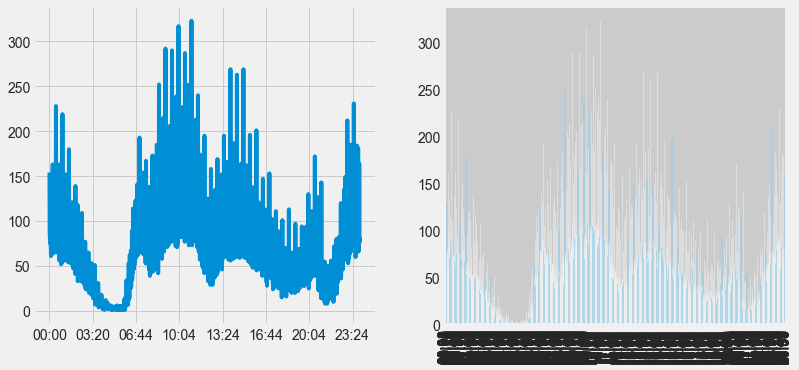

In [27]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
a.stop_time.sort_index().value_counts().sort_index().plot()

plt.subplot(2, 2, 2)
a.stop_time.sort_index().value_counts().sort_index().plot(kind="bar")